In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
import geopandas
import difflib

In [2]:
df = pd.read_csv("GammapyDoc_Country_15Sept2024-6Feb2026.csv", encoding="utf-16")

In [3]:
most_populous = df.sort_values(by="Visits", ascending=False).head(10)
print("Top 10 Most Populous Countries:")
print(most_populous[["Label", "Visits"]])

Top 10 Most Populous Countries:
           Label  Visits
0          China    5465
1         France    5379
2        Germany    5051
3  United States    3388
4          Italy    2706
5          Japan    2288
6         Brazil    1997
7          Spain    1947
8          India    1024
9         Canada     864


In [4]:
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = geopandas.read_file(url)

In [5]:
# US is called something different so need to check the mappings:
print("Unmatched countries:", set(df["Label"]) - set(world["SOVEREIGNT"]))

Unmatched countries: {'Aruba', 'Trinidad & Tobago', 'Serbia', 'Mauritius', 'Macao SAR China', 'Bahamas', 'Guernsey', 'Bahrain', 'Palestinian Territories', 'French Polynesia', 'St. Martin', 'Puerto Rico', 'Sint Maarten', 'Réunion', 'Liechtenstein', 'Malta', 'Maldives', 'Curaçao', 'Singapore', 'Greenland', 'United States', 'Hong Kong SAR China', 'Unknown', 'Türkiye', 'Seychelles', 'Côte d’Ivoire', 'Myanmar (Burma)'}


In [6]:
name = "United States"
matches = difflib.get_close_matches(name, world["SOVEREIGNT"], n=5, cutoff=0.6)
print(matches)

['United States of America', 'United States of America', 'United Arab Emirates']


In [7]:
unmatched = set(df["Label"]) - set(world["SOVEREIGNT"])
for name in unmatched:
    matches = difflib.get_close_matches(name, world["SOVEREIGNT"], n=3, cutoff=0.5)
    print(f"{name} -> {matches}")

Aruba -> ['Cuba', 'Azerbaijan', 'Uruguay']
Trinidad & Tobago -> ['Trinidad and Tobago']
Serbia -> ['Syria', 'Nigeria', 'Liberia']
Mauritius -> ['Mauritania', 'Haiti', 'Vanuatu']
Macao SAR China -> ['China']
Bahamas -> ['The Bahamas', 'Panama', 'Ghana']
Guernsey -> ['Germany', 'Turkey', 'Guinea']
Bahrain -> ['Brazil', 'Bhutan', 'Ukraine']
Palestinian Territories -> []
French Polynesia -> ['Indonesia']
St. Martin -> ['eSwatini', 'Spain', 'Mauritania']
Puerto Rico -> []
Sint Maarten -> ['Suriname']
Réunion -> ['Benin']
Liechtenstein -> []
Malta -> ['Malawi', 'Mali', 'Malaysia']
Maldives -> ['Mali', 'Malawi', 'Bangladesh']
Curaçao -> ['Cuba', 'Burkina Faso', 'Australia']
Singapore -> ['Suriname', 'Senegal', 'Hungary']
Greenland -> ['Ireland', 'Iceland', 'Finland']
United States -> ['United States of America', 'United States of America', 'United Arab Emirates']
Hong Kong SAR China -> []
Unknown -> []
Türkiye -> ['Turkey']
Seychelles -> []
Côte d’Ivoire -> []
Myanmar (Burma) -> ['Myanmar']


In [8]:
name_corrections = {
    "United States": "United States of America",
    "Côte d’Ivoire": "Ivory Coast",
    "Türkiye": "Turkey",
    "Myanmar (Burma)": "Myanmar",
    "Trinidad & Tobago": "Trinidad and Tobago",
    "Bahamas": "The Bahamas"
}
# df["Label"] = df["Label"].str.strip() # Remove leading or trailing spaces
df["Label"] = df["Label"].replace(name_corrections)

In [12]:
print("Unmatched countries:", set(df["Label"]) - set(world["SOVEREIGNT"]))

Unmatched countries: {'Aruba', 'Serbia', 'Mauritius', 'Macao SAR China', 'Guernsey', 'Bahrain', 'Palestinian Territories', 'French Polynesia', 'St. Martin', 'Puerto Rico', 'Sint Maarten', 'Réunion', 'Liechtenstein', 'Malta', 'Maldives', 'Curaçao', 'Singapore', 'Greenland', 'Hong Kong SAR China', 'Unknown', 'Seychelles'}


In [9]:
world = world.merge(df, left_on="SOVEREIGNT", right_on="Label", how="left")

In [10]:
# Remove Antarctica
world = world[world["CONTINENT"] != "Antarctica"]

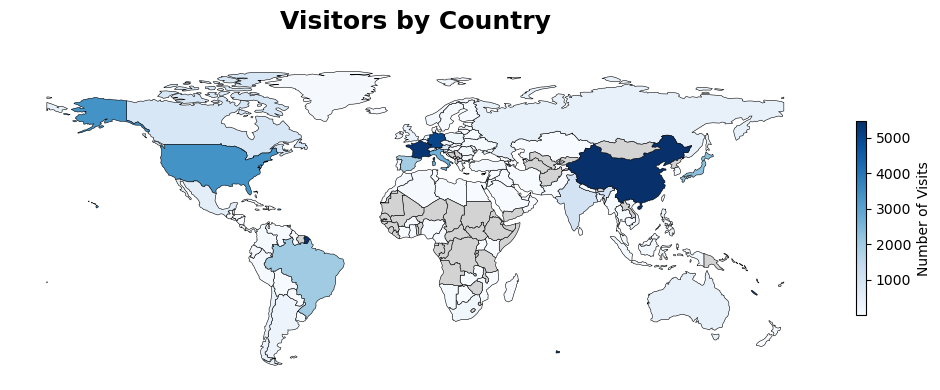

In [11]:
fig, ax = plt.subplots(figsize=(18, 4))#, facecolor = plt.cm.Blues(.2))
world.plot(column="Visits", cmap="Blues", legend=True, linewidth=0.4, edgecolor='black', ax=ax,
              missing_kwds={"color": "lightgrey", "edgecolor": "black",  "hatch": "", "label": "No data"},
              legend_kwds={"label": "Number of Visits", "orientation": "vertical",  "shrink": 0.6,  "pad": 0.02})
ax.set_axis_off()
ax.set_title("Visitors by Country", fontsize=18, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

In [13]:
# world_proj = world.to_crs("+proj=robin")
# world_proj = world.to_crs("+proj=eqearth")
world_proj = world.to_crs("+proj=wintri")

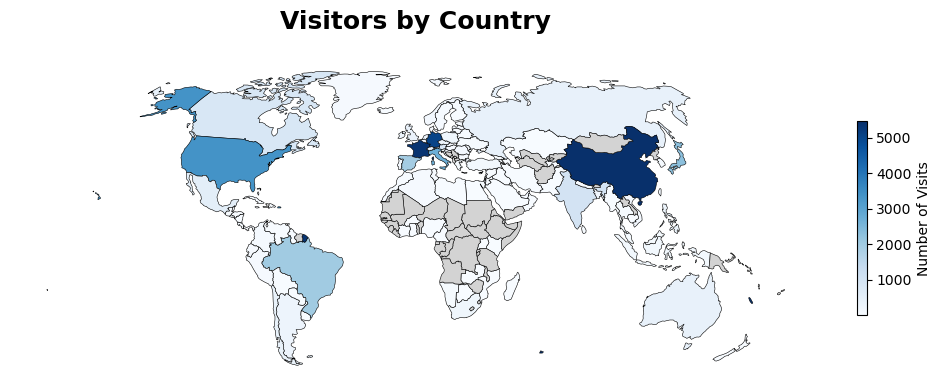

In [14]:
fig, ax = plt.subplots(figsize=(18, 4))#, facecolor = plt.cm.Blues(.2))
world_proj.plot(column="Visits", cmap="Blues", legend=True, linewidth=0.4, edgecolor='black', ax=ax,
              missing_kwds={"color": "lightgrey", "edgecolor": "black",  "hatch": "", "label": "No data"},
              legend_kwds={"label": "Number of Visits", "orientation": "vertical",  "shrink": 0.6,  "pad": 0.02})
ax.set_axis_off()
ax.set_title("Visitors by Country", fontsize=18, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

In [15]:
total_visits = world_proj["Visits"].sum()
world_proj["Visits_pct"] = (world_proj["Visits"] / total_visits) * 100

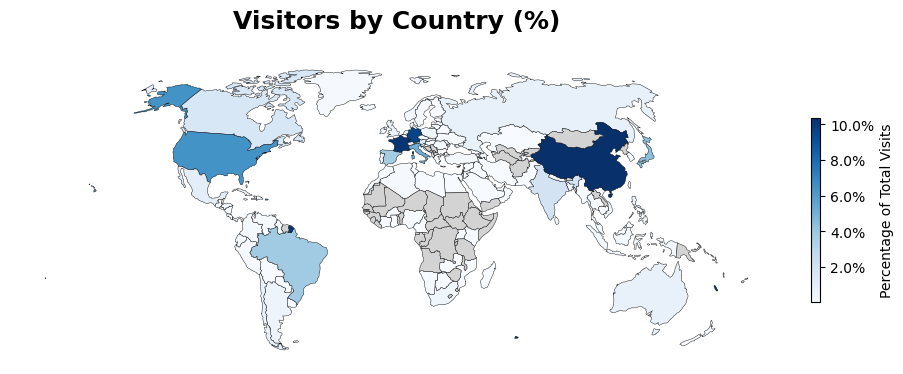

In [17]:
fig, ax = plt.subplots(figsize=(18, 4))
world_proj.plot(column="Visits_pct", cmap="Blues", linewidth=0.3, edgecolor="black", legend=True, ax=ax,
    missing_kwds={"color": "lightgrey","edgecolor": "black"},
    legend_kwds={"label":"Percentage of Total Visits", "format":"%.1f%%", "orientation":"vertical",  "shrink":0.6,  "pad":0.02}
)
ax.set_axis_off()
ax.set_title("Visitors by Country (%)", fontsize=18, fontweight="bold", pad=20)
plt.show()